# Step 1: Import the required libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load the dataset

Replace 'emails.csv' with the path to the dataset file.

In [22]:
df = pd.read_csv("emails.csv")

# Step 3: Data Exploration

In [23]:
print("Dataset Shape:", df.shape)
print("Dataset Sample:\n", df.head())

Dataset Shape: (5172, 3002)
Dataset Sample:
   Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]


Check for missing values

In [24]:
print("Missing values:\n", df.isnull().sum().sum())

Missing values:
 0


# Step 4: Data Preprocessing

Dropping the first column as it is just an email identifier

In [25]:
df.drop(df.columns[0], axis=1, inplace=True)

Separate features and target variable

In [26]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Step 5: Train-Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Feature Scaling

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Dimensionality Reduction for Visualization

Reduce dimensions to 2 for plotting using PCA

In [29]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Visualizing the data distribution after PCA

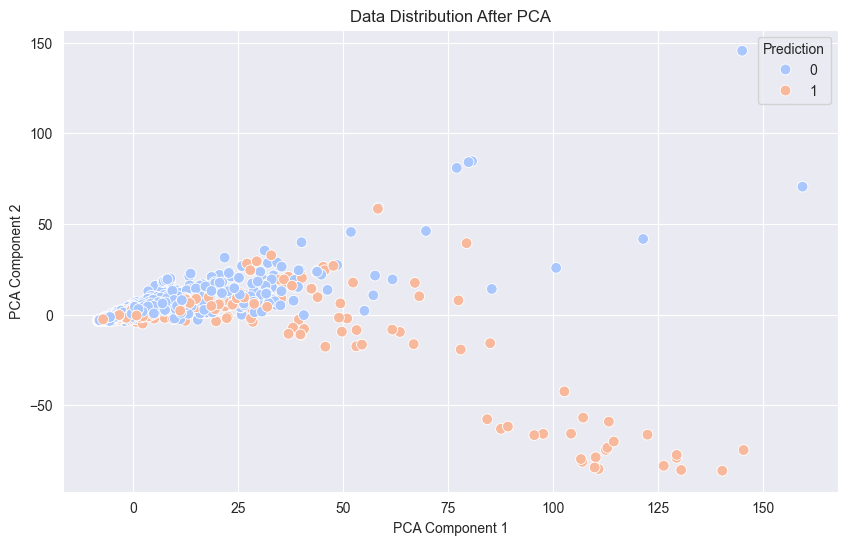

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="coolwarm", s=60)
plt.title("Data Distribution After PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Step 8: Model Training and Evaluation - KNN

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Step 9: Model Training and Evaluation - SVM

In [32]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Step 10: Performance Analysis

Function to display performance metrics

In [33]:
def display_metrics(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False, xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

Display metrics for KNN

--- K-Nearest Neighbors ---
Accuracy: 0.8253865979381443
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.77      0.86      1097
           1       0.63      0.96      0.76       455

    accuracy                           0.83      1552
   macro avg       0.81      0.86      0.81      1552
weighted avg       0.88      0.83      0.83      1552



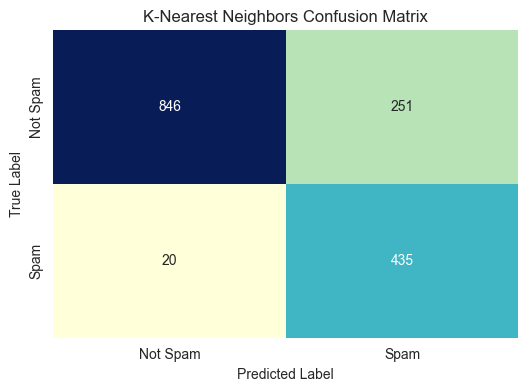

In [34]:
display_metrics(y_test, y_pred_knn, "K-Nearest Neighbors")

Display metrics for SVM

--- Support Vector Machine ---
Accuracy: 0.9400773195876289
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1097
           1       0.89      0.91      0.90       455

    accuracy                           0.94      1552
   macro avg       0.92      0.93      0.93      1552
weighted avg       0.94      0.94      0.94      1552



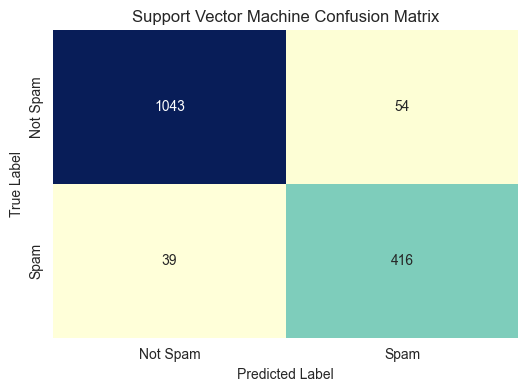

In [35]:
display_metrics(y_test, y_pred_svm, "Support Vector Machine")

# Step 11: Compare Model Performance Using a Bar Chart

In [36]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
model_names = ['K-Nearest Neighbors', 'Support Vector Machine']
accuracies = [knn_accuracy, svm_accuracy]

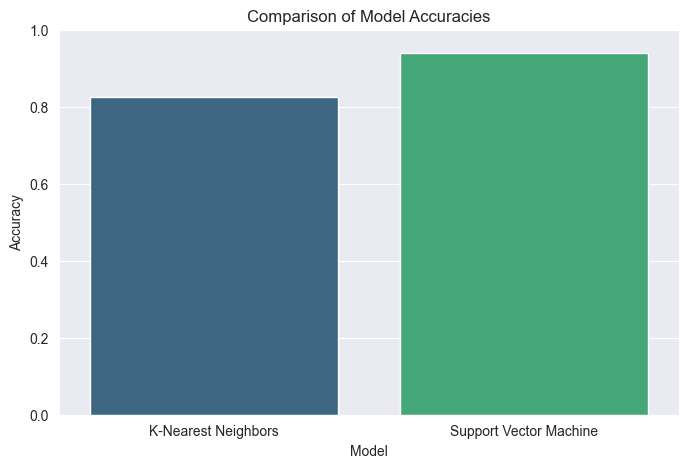

In [37]:
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Comparison of Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Step 12: Add Predictions to the Original DataFrame

Compute predictions on the entire dataset (scaled)

In [38]:
X_scaled = scaler.transform(X)  # Scaling the full feature set for consistency
df['KNN_Prediction'] = knn.predict(X_scaled)
df['SVM_Prediction'] = svm.predict(X_scaled)

Display the updated DataFrame with predictions

In [40]:
df

,the,to,ect,and,for,of,a,you,hou,in,...,valued,lay,infrastructure,military,allowing,ff,dry,Prediction,KNN_Prediction,SVM_Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,1,0,0,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,1,1,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,1,0,1,1,1
